In [8]:
import numpy as np
import pandas as pd
import os
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt

In [2]:
folder_path = r"SST(m)"

all_files = [f for f in os.listdir(folder_path) if f.endswith(".hdf.mat")]

In [3]:
# corresponding to January (DOY 001-031)
january_files = [f for f in all_files if 1 <= int(f[8:11]) <= 31 and int(f[4:8]) == 2023]

print("January files:", january_files)

January files: ['sst.2023017.hdf.mat', 'sst.2023025.hdf.mat', 'sst.2023009.hdf.mat', 'sst.2023001.hdf.mat']


sst.2023017.hdf.mat
sst.2023025.hdf.mat
sst.2023009.hdf.mat
sst.2023001.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


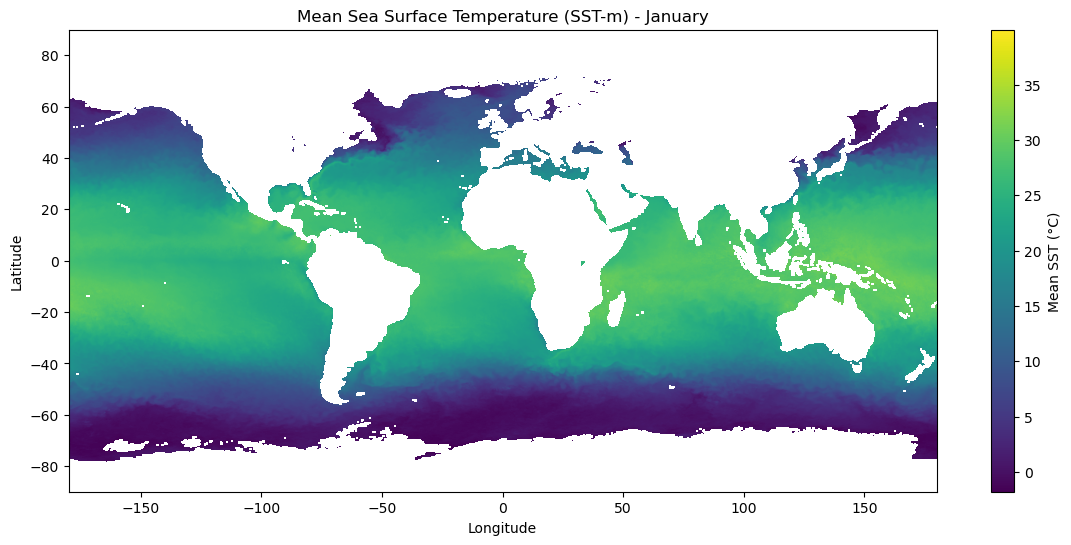

In [7]:
sst_list = []
sst_m_path = r"/Users/.../SST(m)"

# 读取每个文件并添加到列表
for sst_file in january_files:
    print(sst_file)
    file_path = os.path.join(sst_m_path, sst_file)
    sst_data = loadmat(file_path)['dt']
    sst_list.append(sst_data)

# 将所有 SST 数据堆叠为 3D 数组 (time, lat, lon)
sst_stack = np.stack(sst_list, axis=0)

# 计算忽略 NaN 的时间轴平均值
mean_sst = np.nanmean(sst_stack, axis=0)

# 构建纬度和经度
latitudes = np.linspace(
    90 - (180 / mean_sst.shape[0]) / 2,
    -90 + (180 / mean_sst.shape[0]) / 2,
    mean_sst.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_sst.shape[1]) / 2,
    180 - (360 / mean_sst.shape[1]) / 2,
    mean_sst.shape[1]
)

# 绘制平均 SST 分布
plt.figure(figsize=(14, 6))
plt.imshow(mean_sst, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()],
           origin='upper', cmap='viridis', aspect='auto')
plt.colorbar(label='Mean SST (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Sea Surface Temperature (SST-m) - January')
plt.show()

In [9]:
output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_SST': mean_sst
}

# 保存为新的 .mat 文件
output_file = 'mean_sst_01.mat'
savemat(output_file, output_data)

print(f"New .mat file saved to {output_file}")

New .mat file saved to mean_sst_01.mat


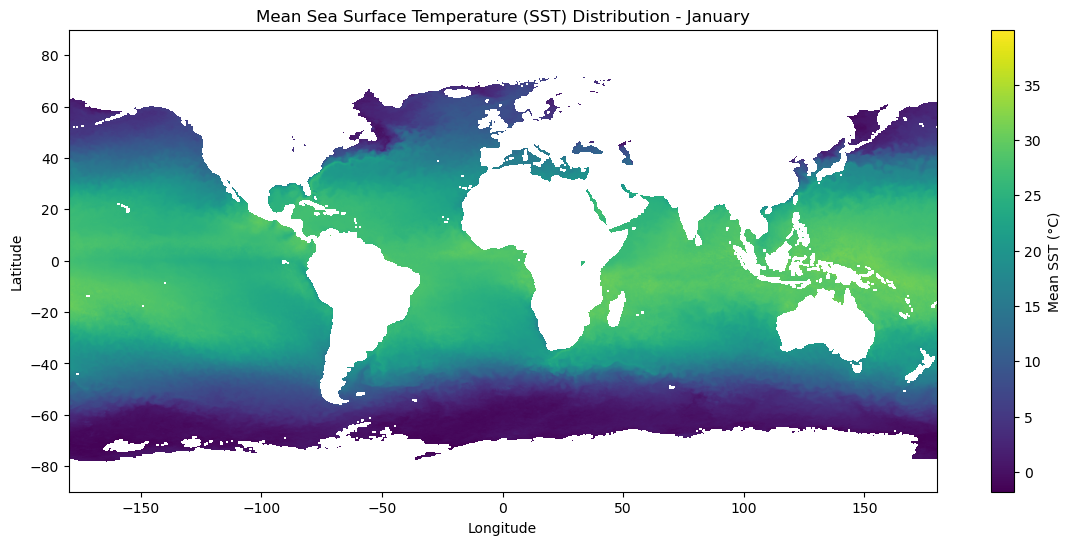

In [14]:
data = loadmat('mean_sst_01.mat')

# Extract the data from the file
latitudes = data['LATITUDE'].flatten()  # Ensure it's a 1D array
longitudes = data['LONGITUDE'].flatten()  # Ensure it's a 1D array
mean_sst = data['mean_SST']  # This should be the 2D array of SST values

# Plotting the SST map
plt.figure(figsize=(14, 6))
plt.imshow(mean_sst, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()],
           origin='upper', cmap='viridis', aspect='auto')
plt.colorbar(label='Mean SST (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Sea Surface Temperature (SST) Distribution - January')
plt.show()

In [15]:
# February

In [16]:
feb_files = [f for f in all_files if 32 <= int(f[8:11]) <= 60 and int(f[4:8]) == 2023]

print("February files:", feb_files)

February files: ['sst.2023049.hdf.mat', 'sst.2023033.hdf.mat', 'sst.2023041.hdf.mat', 'sst.2023057.hdf.mat']


sst.2023049.hdf.mat
sst.2023033.hdf.mat
sst.2023041.hdf.mat
sst.2023057.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == "":


New .mat file saved to mean_sst_02.mat


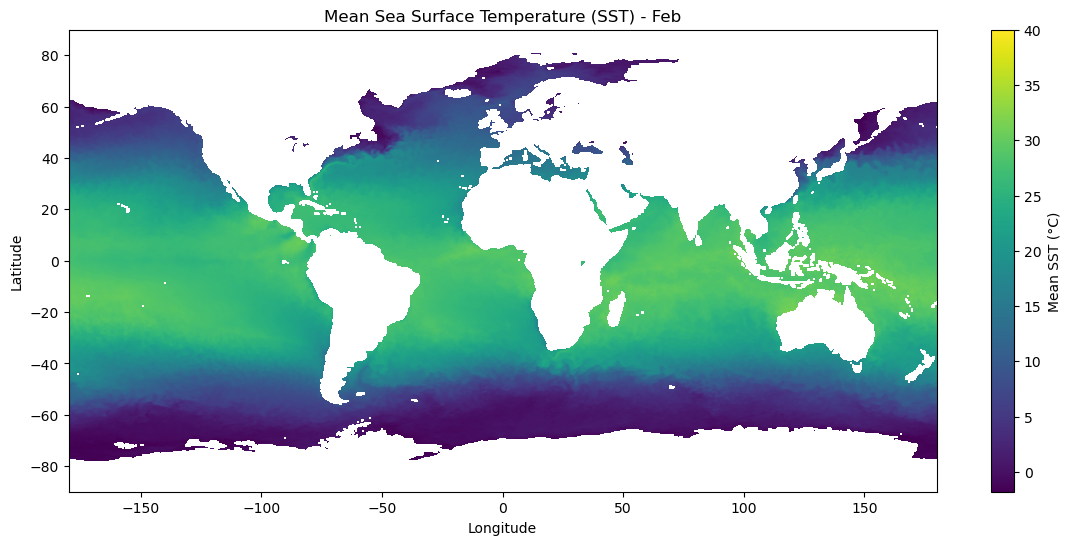

In [18]:
sst_list = []
sst_path = r"/Users/.../SST(m)"

for sst_file in feb_files:
    print(sst_file)
    file_path = os.path.join(sst_path, sst_file)
    sst_data = loadmat(file_path)['dt']
    sst_list.append(sst_data)

sst_stack = np.stack(sst_list, axis=0)

mean_sst = np.nanmean(sst_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_sst.shape[0]) / 2,
    -90 + (180 / mean_sst.shape[0]) / 2,
    mean_sst.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_sst.shape[1]) / 2,
    180 - (360 / mean_sst.shape[1]) / 2,
    mean_sst.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_SST': mean_sst
}

# 保存为新的 .mat 文件
output_file = 'mean_sst_02.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

plt.figure(figsize=(14, 6))
plt.imshow(mean_sst, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()],
           origin='upper', cmap='viridis', aspect='auto')
plt.colorbar(label='Mean SST (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Sea Surface Temperature (SST) - Feb')
plt.show()

March files: ['sst.2023081.hdf.mat', 'sst.2023065.hdf.mat', 'sst.2023089.hdf.mat', 'sst.2023073.hdf.mat']
sst.2023081.hdf.mat
sst.2023065.hdf.mat
sst.2023089.hdf.mat
sst.2023073.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


New .mat file saved to mean_sst_03.mat


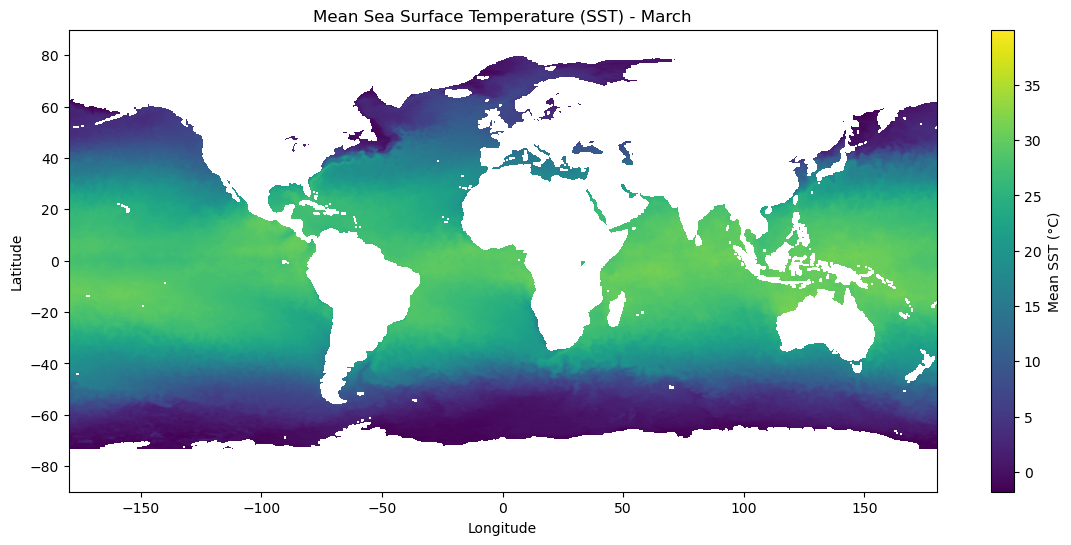

In [19]:
# March
march_files = [f for f in all_files if 61 <= int(f[8:11]) <= 90 and int(f[4:8]) == 2023]
print("March files:", march_files)

sst_list = []
sst_path = r"/Users/.../SST(m)"

for sst_file in march_files:
    print(sst_file)
    file_path = os.path.join(sst_path, sst_file)
    sst_data = loadmat(file_path)['dt']
    sst_list.append(sst_data)

sst_stack = np.stack(sst_list, axis=0)

mean_sst = np.nanmean(sst_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_sst.shape[0]) / 2,
    -90 + (180 / mean_sst.shape[0]) / 2,
    mean_sst.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_sst.shape[1]) / 2,
    180 - (360 / mean_sst.shape[1]) / 2,
    mean_sst.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_SST': mean_sst
}

# 保存为新的 .mat 文件
output_file = 'mean_sst_03.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

plt.figure(figsize=(14, 6))
plt.imshow(mean_sst, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()],
           origin='upper', cmap='viridis', aspect='auto')
plt.colorbar(label='Mean SST (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Sea Surface Temperature (SST) - March')
plt.show()

April files: ['sst.2023105.hdf.mat', 'sst.2023113.hdf.mat', 'sst.2023097.hdf.mat']
sst.2023105.hdf.mat
sst.2023113.hdf.mat
sst.2023097.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


New .mat file saved to mean_sst_04.mat


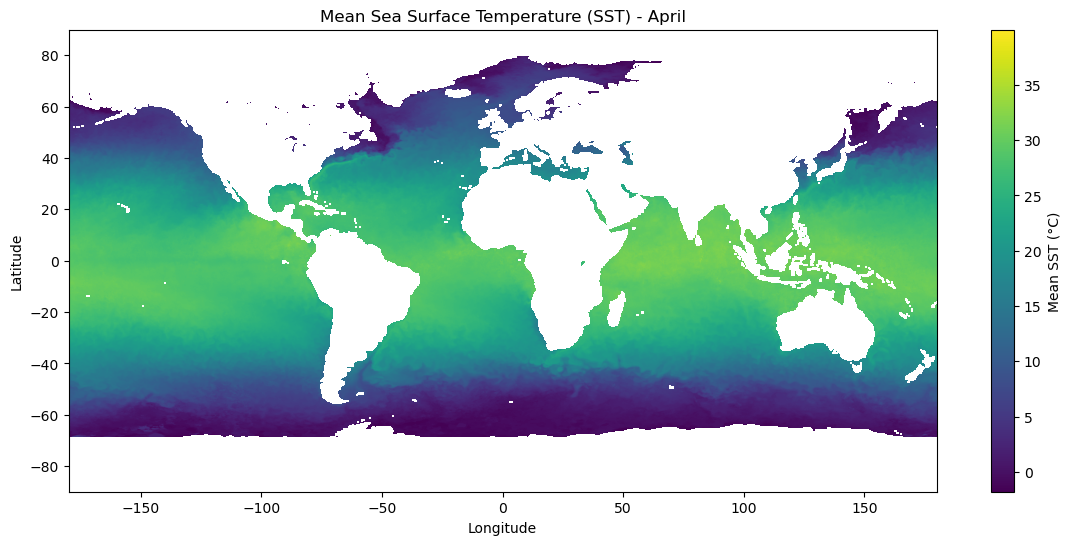

In [20]:
# April
april_files = [f for f in all_files if 90 <= int(f[8:11]) <= 120 and int(f[4:8]) == 2023]
print("April files:", april_files)

sst_list = []
sst_path = r"/Users/.../SST(m)"

for sst_file in april_files:
    print(sst_file)
    file_path = os.path.join(sst_path, sst_file)
    sst_data = loadmat(file_path)['dt']
    sst_list.append(sst_data)

sst_stack = np.stack(sst_list, axis=0)

mean_sst = np.nanmean(sst_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_sst.shape[0]) / 2,
    -90 + (180 / mean_sst.shape[0]) / 2,
    mean_sst.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_sst.shape[1]) / 2,
    180 - (360 / mean_sst.shape[1]) / 2,
    mean_sst.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_SST': mean_sst
}

# 保存为新的 .mat 文件
output_file = 'mean_sst_04.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

plt.figure(figsize=(14, 6))
plt.imshow(mean_sst, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()],
           origin='upper', cmap='viridis', aspect='auto')
plt.colorbar(label='Mean SST (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Sea Surface Temperature (SST) - April')
plt.show()

May files: ['sst.2023121.hdf.mat', 'sst.2023129.hdf.mat', 'sst.2023145.hdf.mat', 'sst.2023137.hdf.mat']
sst.2023121.hdf.mat
sst.2023129.hdf.mat
sst.2023145.hdf.mat
sst.2023137.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


New .mat file saved to mean_sst_05.mat


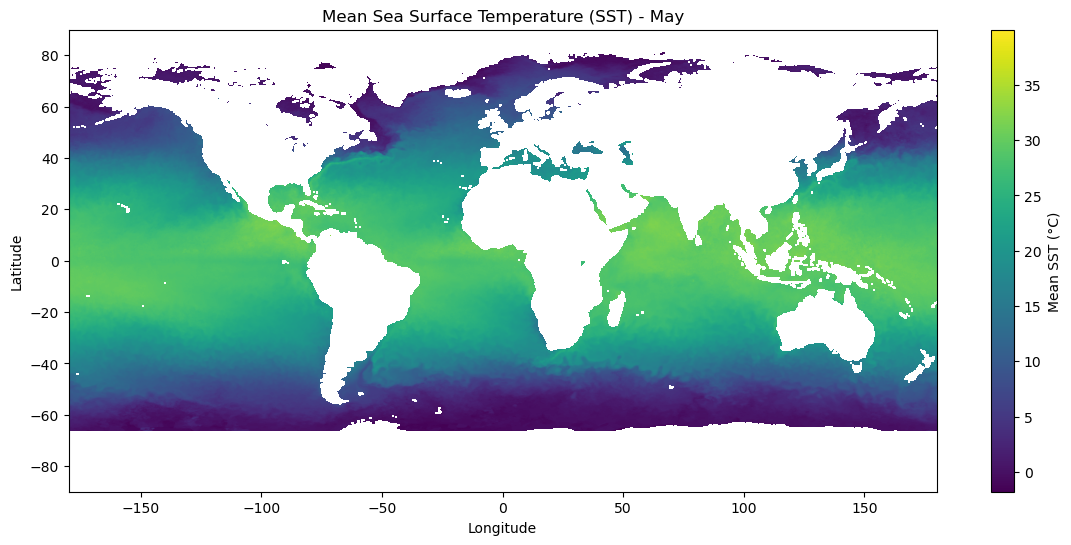

In [21]:
# May
may_files = [f for f in all_files if 121 <= int(f[8:11]) <= 150 and int(f[4:8]) == 2023]
print("May files:", may_files)

sst_list = []
sst_path = r"/Users/.../SST(m)"

for sst_file in may_files:
    print(sst_file)
    file_path = os.path.join(sst_path, sst_file)
    sst_data = loadmat(file_path)['dt']
    sst_list.append(sst_data)

sst_stack = np.stack(sst_list, axis=0)

mean_sst = np.nanmean(sst_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_sst.shape[0]) / 2,
    -90 + (180 / mean_sst.shape[0]) / 2,
    mean_sst.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_sst.shape[1]) / 2,
    180 - (360 / mean_sst.shape[1]) / 2,
    mean_sst.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_SST': mean_sst
}

# 保存为新的 .mat 文件
output_file = 'mean_sst_05.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

plt.figure(figsize=(14, 6))
plt.imshow(mean_sst, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()],
           origin='upper', cmap='viridis', aspect='auto')
plt.colorbar(label='Mean SST (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Sea Surface Temperature (SST) - May')
plt.show()

June files: ['sst.2023153.hdf.mat', 'sst.2023177.hdf.mat', 'sst.2023161.hdf.mat', 'sst.2023169.hdf.mat']
sst.2023153.hdf.mat
sst.2023177.hdf.mat
sst.2023161.hdf.mat
sst.2023169.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


New .mat file saved to mean_sst_06.mat


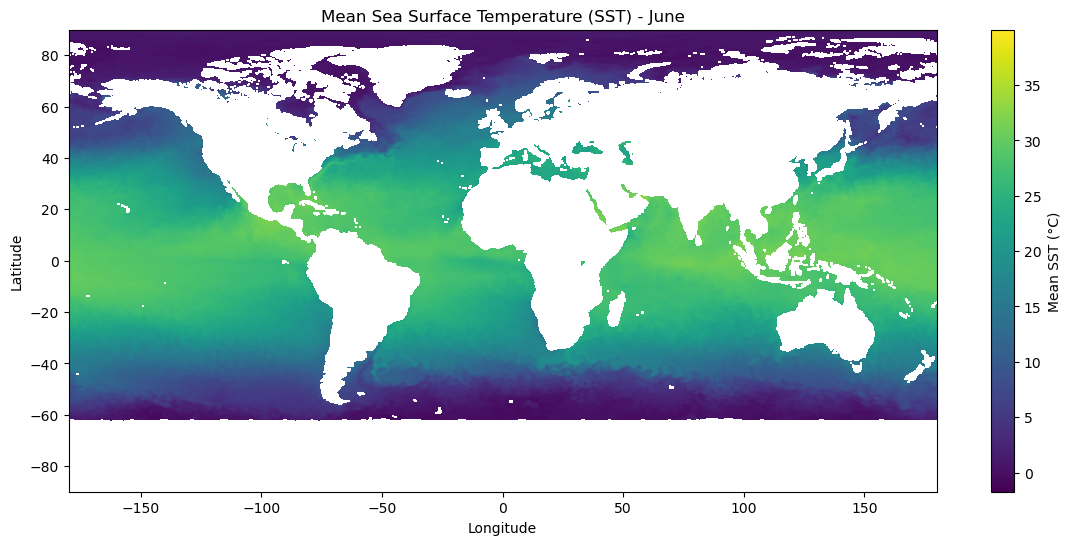

In [22]:
# June
june_files = [f for f in all_files if 151 <= int(f[8:11]) <= 180 and int(f[4:8]) == 2023]
print("June files:", june_files)

sst_list = []
sst_path = r"/Users/.../SST(m)"

for sst_file in june_files:
    print(sst_file)
    file_path = os.path.join(sst_path, sst_file)
    sst_data = loadmat(file_path)['dt']
    sst_list.append(sst_data)

sst_stack = np.stack(sst_list, axis=0)

mean_sst = np.nanmean(sst_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_sst.shape[0]) / 2,
    -90 + (180 / mean_sst.shape[0]) / 2,
    mean_sst.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_sst.shape[1]) / 2,
    180 - (360 / mean_sst.shape[1]) / 2,
    mean_sst.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_SST': mean_sst
}

# 保存为新的 .mat 文件
output_file = 'mean_sst_06.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

plt.figure(figsize=(14, 6))
plt.imshow(mean_sst, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()],
           origin='upper', cmap='viridis', aspect='auto')
plt.colorbar(label='Mean SST (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Sea Surface Temperature (SST) - June')
plt.show()

July files: ['sst.2023209.hdf.mat', 'sst.2023193.hdf.mat', 'sst.2023201.hdf.mat', 'sst.2023185.hdf.mat']
sst.2023209.hdf.mat
sst.2023193.hdf.mat
sst.2023201.hdf.mat
sst.2023185.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


New .mat file saved to mean_sst_07.mat


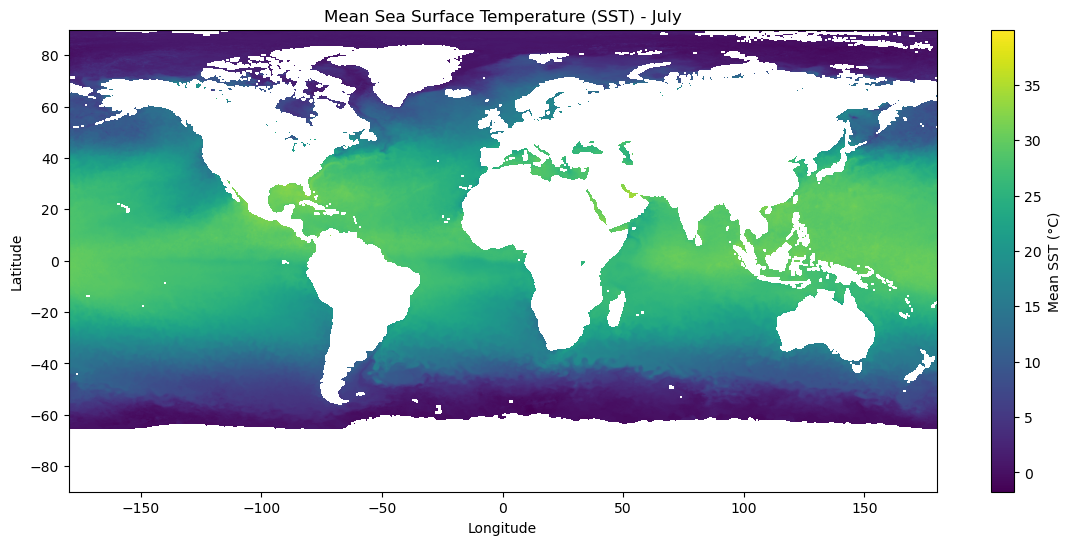

In [23]:
# July
july_files = [f for f in all_files if 181 <= int(f[8:11]) <= 211 and int(f[4:8]) == 2023]
print("July files:", july_files)

sst_list = []
sst_path = r"/Users/.../SST(m)"

for sst_file in july_files:
    print(sst_file)
    file_path = os.path.join(sst_path, sst_file)
    sst_data = loadmat(file_path)['dt']
    sst_list.append(sst_data)

sst_stack = np.stack(sst_list, axis=0)

mean_sst = np.nanmean(sst_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_sst.shape[0]) / 2,
    -90 + (180 / mean_sst.shape[0]) / 2,
    mean_sst.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_sst.shape[1]) / 2,
    180 - (360 / mean_sst.shape[1]) / 2,
    mean_sst.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_SST': mean_sst
}

# 保存为新的 .mat 文件
output_file = 'mean_sst_07.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

plt.figure(figsize=(14, 6))
plt.imshow(mean_sst, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()],
           origin='upper', cmap='viridis', aspect='auto')
plt.colorbar(label='Mean SST (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Sea Surface Temperature (SST) - July')
plt.show()

August files: ['sst.2022241.hdf.mat', 'sst.2022233.hdf.mat', 'sst.2022217.hdf.mat', 'sst.2022225.hdf.mat']
sst.2022241.hdf.mat
sst.2022233.hdf.mat
sst.2022217.hdf.mat
sst.2022225.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


New .mat file saved to mean_sst_08.mat


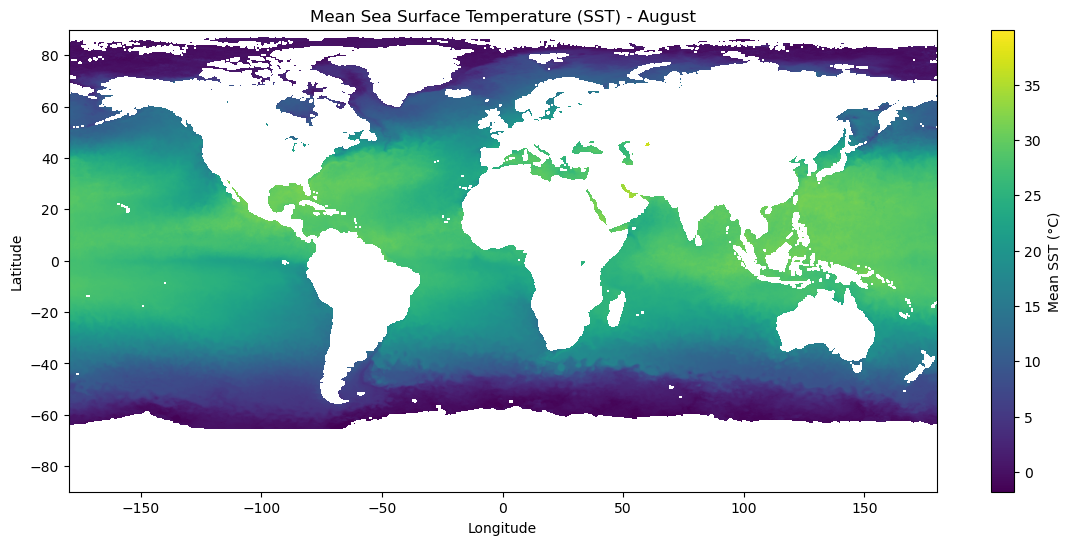

In [25]:
# August
august_files = [f for f in all_files if 212 <= int(f[8:11]) <= 242 and int(f[4:8]) == 2022]
print("August files:", august_files)

sst_list = []
sst_path = r"/Users/.../SST(m)"

for sst_file in august_files:
    print(sst_file)
    file_path = os.path.join(sst_path, sst_file)
    sst_data = loadmat(file_path)['dt']
    sst_list.append(sst_data)

sst_stack = np.stack(sst_list, axis=0)

mean_sst = np.nanmean(sst_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_sst.shape[0]) / 2,
    -90 + (180 / mean_sst.shape[0]) / 2,
    mean_sst.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_sst.shape[1]) / 2,
    180 - (360 / mean_sst.shape[1]) / 2,
    mean_sst.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_SST': mean_sst
}

# 保存为新的 .mat 文件
output_file = 'mean_sst_08.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

plt.figure(figsize=(14, 6))
plt.imshow(mean_sst, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()],
           origin='upper', cmap='viridis', aspect='auto')
plt.colorbar(label='Mean SST (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Sea Surface Temperature (SST) - August')
plt.show()

Sep files: ['sst.2022249.hdf.mat', 'sst.2022265.hdf.mat', 'sst.2022257.hdf.mat']
sst.2022249.hdf.mat
sst.2022265.hdf.mat
sst.2022257.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


New .mat file saved to mean_sst_09.mat


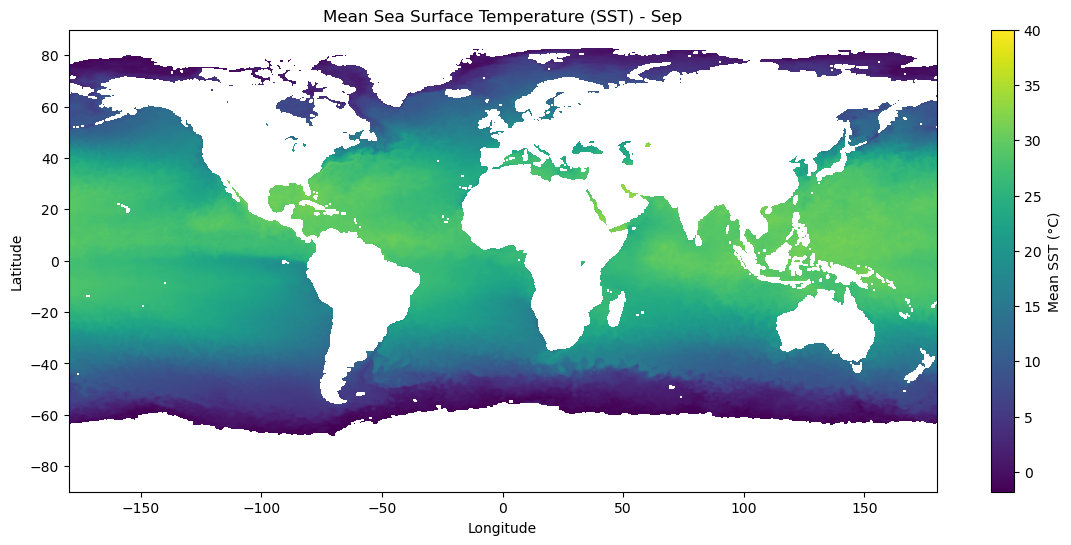

In [27]:
# Sep
sep_files = [f for f in all_files if 243 <= int(f[8:11]) <= 272 and int(f[4:8]) == 2022]
print("Sep files:", sep_files)

sst_list = []
sst_path = r"/Users/.../SST(m)"

for sst_file in sep_files:
    print(sst_file)
    file_path = os.path.join(sst_path, sst_file)
    sst_data = loadmat(file_path)['dt']
    sst_list.append(sst_data)

sst_stack = np.stack(sst_list, axis=0)

mean_sst = np.nanmean(sst_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_sst.shape[0]) / 2,
    -90 + (180 / mean_sst.shape[0]) / 2,
    mean_sst.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_sst.shape[1]) / 2,
    180 - (360 / mean_sst.shape[1]) / 2,
    mean_sst.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_SST': mean_sst
}

# 保存为新的 .mat 文件
output_file = 'mean_sst_09.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

plt.figure(figsize=(14, 6))
plt.imshow(mean_sst, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()],
           origin='upper', cmap='viridis', aspect='auto')
plt.colorbar(label='Mean SST (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Sea Surface Temperature (SST) - Sep')
plt.show()

Oct files: ['sst.2022289.hdf.mat', 'sst.2022281.hdf.mat', 'sst.2022297.hdf.mat', 'sst.2022273.hdf.mat']
sst.2022289.hdf.mat
sst.2022281.hdf.mat
sst.2022297.hdf.mat
sst.2022273.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


New .mat file saved to mean_sst_10.mat


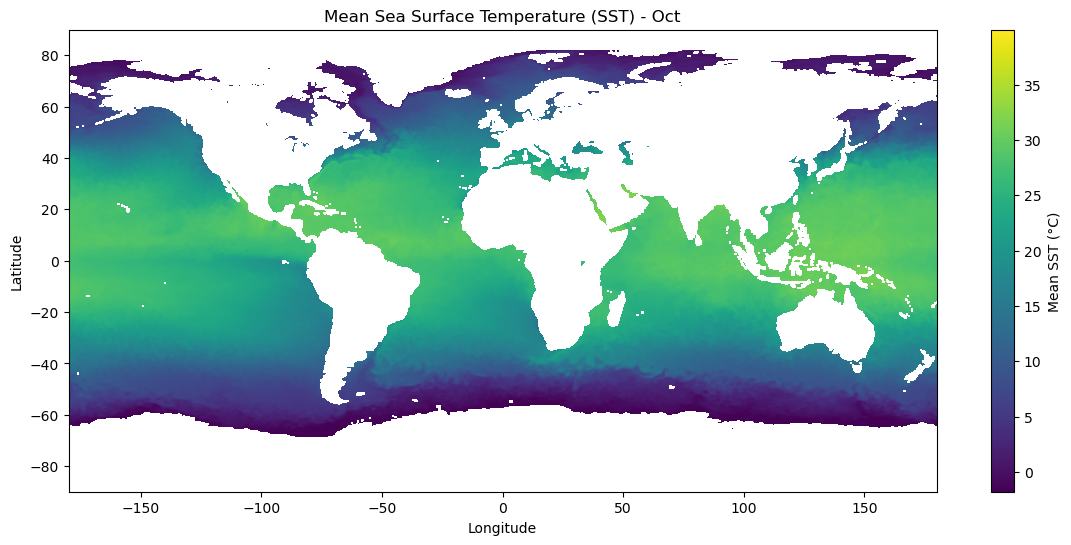

In [28]:
# Oct
oct_files = [f for f in all_files if 273 <= int(f[8:11]) <= 303 and int(f[4:8]) == 2022]
print("Oct files:", oct_files)

sst_list = []
sst_path = r"/Users/.../SST(m)"

for sst_file in oct_files:
    print(sst_file)
    file_path = os.path.join(sst_path, sst_file)
    sst_data = loadmat(file_path)['dt']
    sst_list.append(sst_data)

sst_stack = np.stack(sst_list, axis=0)

mean_sst = np.nanmean(sst_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_sst.shape[0]) / 2,
    -90 + (180 / mean_sst.shape[0]) / 2,
    mean_sst.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_sst.shape[1]) / 2,
    180 - (360 / mean_sst.shape[1]) / 2,
    mean_sst.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_SST': mean_sst
}

# 保存为新的 .mat 文件
output_file = 'mean_sst_10.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

plt.figure(figsize=(14, 6))
plt.imshow(mean_sst, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()],
           origin='upper', cmap='viridis', aspect='auto')
plt.colorbar(label='Mean SST (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Sea Surface Temperature (SST) - Oct')
plt.show()

Nov files: ['sst.2022329.hdf.mat', 'sst.2022321.hdf.mat', 'sst.2022305.hdf.mat', 'sst.2022313.hdf.mat']
sst.2022329.hdf.mat
sst.2022321.hdf.mat
sst.2022305.hdf.mat
sst.2022313.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


New .mat file saved to mean_sst_11.mat


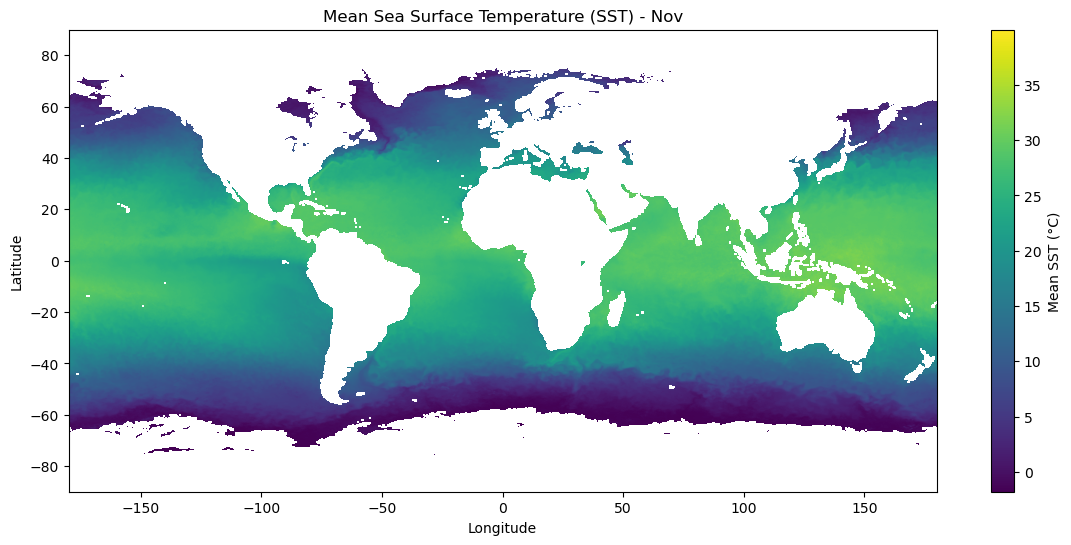

In [29]:
# Nov
nov_files = [f for f in all_files if 304 <= int(f[8:11]) <= 333 and int(f[4:8]) == 2022]
print("Nov files:", nov_files)

sst_list = []
sst_path = r"/Users/.../SST(m)"

for sst_file in nov_files:
    print(sst_file)
    file_path = os.path.join(sst_path, sst_file)
    sst_data = loadmat(file_path)['dt']
    sst_list.append(sst_data)

sst_stack = np.stack(sst_list, axis=0)

mean_sst = np.nanmean(sst_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_sst.shape[0]) / 2,
    -90 + (180 / mean_sst.shape[0]) / 2,
    mean_sst.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_sst.shape[1]) / 2,
    180 - (360 / mean_sst.shape[1]) / 2,
    mean_sst.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_SST': mean_sst
}

# 保存为新的 .mat 文件
output_file = 'mean_sst_11.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

plt.figure(figsize=(14, 6))
plt.imshow(mean_sst, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()],
           origin='upper', cmap='viridis', aspect='auto')
plt.colorbar(label='Mean SST (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Sea Surface Temperature (SST) - Nov')
plt.show()

Dec files: ['sst.2022353.hdf.mat', 'sst.2022337.hdf.mat', 'sst.2022345.hdf.mat', 'sst.2022361.hdf.mat']
sst.2022353.hdf.mat
sst.2022337.hdf.mat
sst.2022345.hdf.mat
sst.2022361.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  


New .mat file saved to mean_sst_12.mat


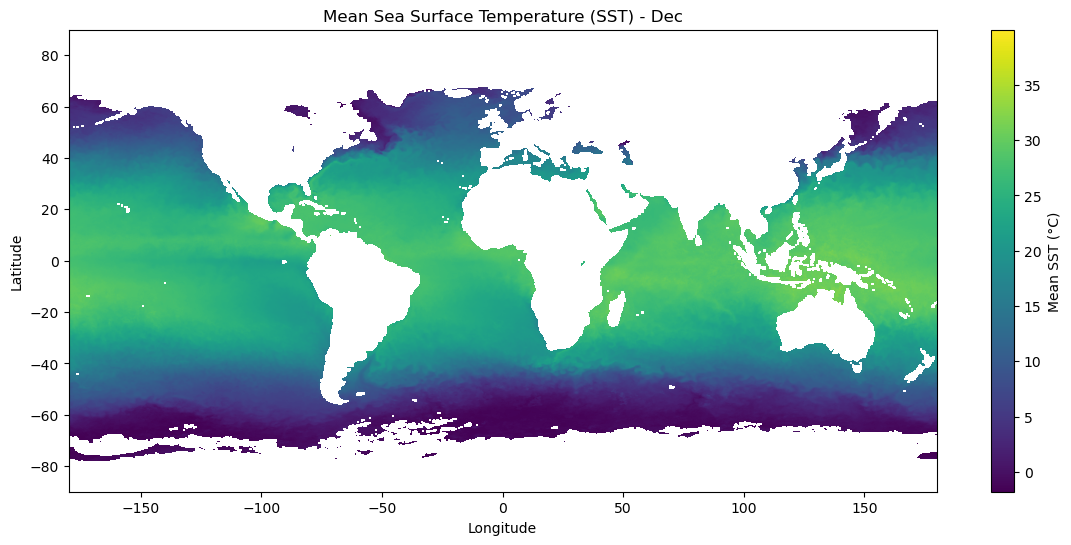

In [30]:
# Dec
dec_files = [f for f in all_files if 334 <= int(f[8:11]) <= 365 and int(f[4:8]) == 2022]
print("Dec files:", dec_files)

sst_list = []
sst_path = r"/Users/.../SST(m)"

for sst_file in dec_files:
    print(sst_file)
    file_path = os.path.join(sst_path, sst_file)
    sst_data = loadmat(file_path)['dt']
    sst_list.append(sst_data)

sst_stack = np.stack(sst_list, axis=0)

mean_sst = np.nanmean(sst_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_sst.shape[0]) / 2,
    -90 + (180 / mean_sst.shape[0]) / 2,
    mean_sst.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_sst.shape[1]) / 2,
    180 - (360 / mean_sst.shape[1]) / 2,
    mean_sst.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_SST': mean_sst
}

# 保存为新的 .mat 文件
output_file = 'mean_sst_12.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

plt.figure(figsize=(14, 6))
plt.imshow(mean_sst, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()],
           origin='upper', cmap='viridis', aspect='auto')
plt.colorbar(label='Mean SST (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Sea Surface Temperature (SST) - Dec')
plt.show()

### CHL

In [31]:
folder_path = r"/Users/.../CHL(m)"
all_files = [f for f in os.listdir(folder_path) if f.endswith(".hdf.mat")]

January files: ['chl.2023017.hdf.mat', 'chl.2023009.hdf.mat', 'chl.2023001.hdf.mat', 'chl.2023025.hdf.mat']
chl.2023017.hdf.mat
chl.2023009.hdf.mat
chl.2023001.hdf.mat
chl.2023025.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


New .mat file saved to mean_chl_01.mat


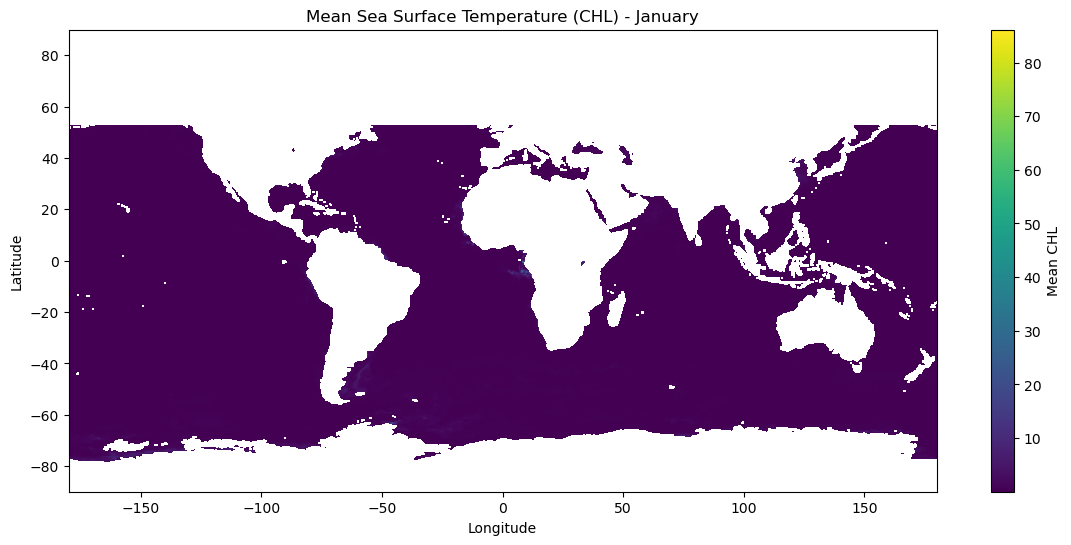

In [32]:
january_files = [f for f in all_files if 1 <= int(f[8:11]) <= 31 and int(f[4:8]) == 2023]
print("January files:", january_files)

chl_list = []
chl_path = r"/Users/.../CHL(m)"

# 读取每个文件并添加到列表
for chl_file in january_files:
    print(chl_file)
    file_path = os.path.join(chl_path, chl_file)
    chl_data = loadmat(file_path)['dt']
    chl_list.append(chl_data)

# 将所有 SST 数据堆叠为 3D 数组 (time, lat, lon)
chl_stack = np.stack(chl_list, axis=0)

# 计算忽略 NaN 的时间轴平均值
mean_chl = np.nanmean(chl_stack, axis=0)

# 构建纬度和经度
latitudes = np.linspace(
    90 - (180 / mean_chl.shape[0]) / 2,
    -90 + (180 / mean_chl.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_chl.shape[1]) / 2,
    180 - (360 / mean_chl.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_chl
}

# 保存为新的 .mat 文件
output_file = 'mean_chl_01.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

# 绘制平均 SST 分布
plt.figure(figsize=(14, 6))
plt.imshow(mean_chl, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()],
           origin='upper', cmap='viridis', aspect='auto')
plt.colorbar(label='Mean CHL')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Sea Surface Temperature (CHL) - January')
plt.show()

Feb files: ['chl.2023049.hdf.mat', 'chl.2023041.hdf.mat', 'chl.2023033.hdf.mat', 'chl.2023057.hdf.mat']
chl.2023049.hdf.mat
chl.2023041.hdf.mat
chl.2023033.hdf.mat
chl.2023057.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


New .mat file saved to mean_chl_02.mat


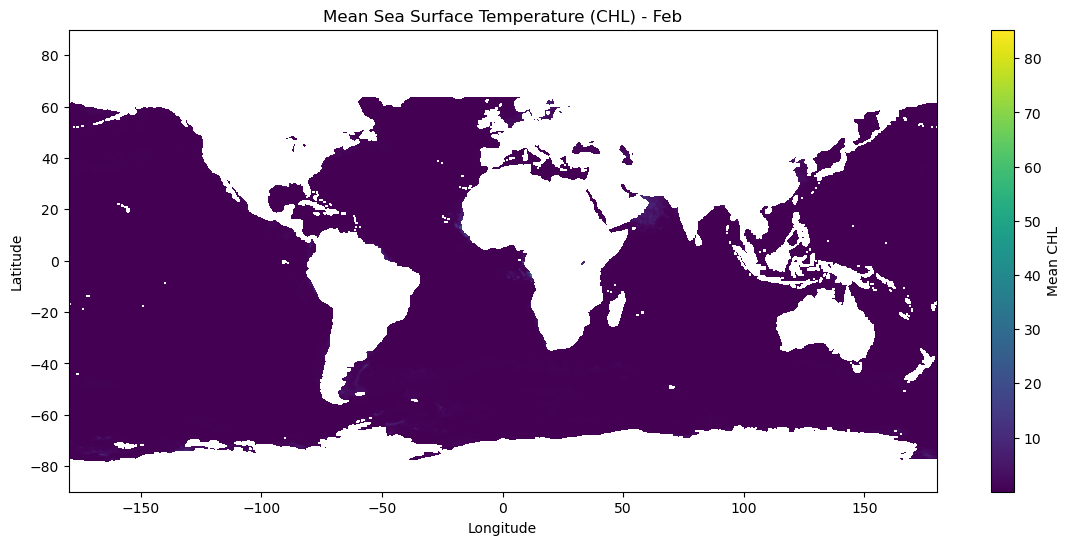

In [33]:
feb_files = [f for f in all_files if 32 <= int(f[8:11]) <= 60 and int(f[4:8]) == 2023]
print("Feb files:", feb_files)

chl_list = []
chl_path = r"/Users/.../CHL(m)"

for chl_file in feb_files:
    print(chl_file)
    file_path = os.path.join(chl_path, chl_file)
    chl_data = loadmat(file_path)['dt']
    chl_list.append(chl_data)

chl_stack = np.stack(chl_list, axis=0)

mean_chl = np.nanmean(chl_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_chl.shape[0]) / 2,
    -90 + (180 / mean_chl.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_chl.shape[1]) / 2,
    180 - (360 / mean_chl.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_chl
}

# 保存为新的 .mat 文件
output_file = 'mean_chl_02.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

plt.figure(figsize=(14, 6))
plt.imshow(mean_chl, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()],
           origin='upper', cmap='viridis', aspect='auto')
plt.colorbar(label='Mean CHL')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Sea Surface Temperature (CHL) - Feb')
plt.show()

In [34]:
march_files = [f for f in all_files if 61 <= int(f[8:11]) <= 90 and int(f[4:8]) == 2023]
print("March files:", march_files)

chl_list = []
chl_path = r"/Users/.../CHL(m)"

for chl_file in march_files:
    print(chl_file)
    file_path = os.path.join(chl_path, chl_file)
    chl_data = loadmat(file_path)['dt']
    chl_list.append(chl_data)

chl_stack = np.stack(chl_list, axis=0)

mean_chl = np.nanmean(chl_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_chl.shape[0]) / 2,
    -90 + (180 / mean_chl.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_chl.shape[1]) / 2,
    180 - (360 / mean_chl.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_chl
}

# 保存为新的 .mat 文件
output_file = 'mean_chl_03.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")


March files: ['chl.2023065.hdf.mat', 'chl.2023081.hdf.mat', 'chl.2023089.hdf.mat', 'chl.2023073.hdf.mat']
chl.2023065.hdf.mat
chl.2023081.hdf.mat
chl.2023089.hdf.mat
chl.2023073.hdf.mat
New .mat file saved to mean_chl_03.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


In [36]:
april_files = [f for f in all_files if 90 <= int(f[8:11]) <= 120 and int(f[4:8]) == 2023]
print("April files:", april_files)

chl_list = []
chl_path = r"/Users/.../CHL(m)"

for chl_file in april_files:
    print(chl_file)
    file_path = os.path.join(chl_path, chl_file)
    chl_data = loadmat(file_path)['dt']
    chl_list.append(chl_data)

chl_stack = np.stack(chl_list, axis=0)

mean_chl = np.nanmean(chl_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_chl.shape[0]) / 2,
    -90 + (180 / mean_chl.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_chl.shape[1]) / 2,
    180 - (360 / mean_chl.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_chl
}

# 保存为新的 .mat 文件
output_file = 'mean_chl_04.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")


April files: ['chl.2023105.hdf.mat', 'chl.2023113.hdf.mat', 'chl.2023097.hdf.mat']
chl.2023105.hdf.mat
chl.2023113.hdf.mat
chl.2023097.hdf.mat
New .mat file saved to mean_chl_04.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


In [37]:
may_files = [f for f in all_files if 121 <= int(f[8:11]) <= 151 and int(f[4:8]) == 2023]
print("May files:", may_files)

chl_list = []
chl_path = r"/Users/.../CHL(m)"

for chl_file in may_files:
    print(chl_file)
    file_path = os.path.join(chl_path, chl_file)
    chl_data = loadmat(file_path)['dt']
    chl_list.append(chl_data)

chl_stack = np.stack(chl_list, axis=0)

mean_chl = np.nanmean(chl_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_chl.shape[0]) / 2,
    -90 + (180 / mean_chl.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_chl.shape[1]) / 2,
    180 - (360 / mean_chl.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_chl
}

# 保存为新的 .mat 文件
output_file = 'mean_chl_05.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")


May files: ['chl.2023121.hdf.mat', 'chl.2023129.hdf.mat', 'chl.2023137.hdf.mat', 'chl.2023145.hdf.mat']
chl.2023121.hdf.mat
chl.2023129.hdf.mat
chl.2023137.hdf.mat
chl.2023145.hdf.mat
New .mat file saved to mean_chl_05.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


In [38]:
june_files = [f for f in all_files if 152 <= int(f[8:11]) <= 181 and int(f[4:8]) == 2023]
print("June files:", june_files)

chl_list = []
chl_path = r"/Users/.../CHL(m)"

for chl_file in june_files:
    print(chl_file)
    file_path = os.path.join(chl_path, chl_file)
    chl_data = loadmat(file_path)['dt']
    chl_list.append(chl_data)

chl_stack = np.stack(chl_list, axis=0)

mean_chl = np.nanmean(chl_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_chl.shape[0]) / 2,
    -90 + (180 / mean_chl.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_chl.shape[1]) / 2,
    180 - (360 / mean_chl.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_chl
}

# 保存为新的 .mat 文件
output_file = 'mean_chl_06.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")


June files: ['chl.2023177.hdf.mat', 'chl.2023153.hdf.mat', 'chl.2023161.hdf.mat', 'chl.2023169.hdf.mat']
chl.2023177.hdf.mat
chl.2023153.hdf.mat
chl.2023161.hdf.mat
chl.2023169.hdf.mat
New .mat file saved to mean_chl_06.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


In [39]:
july_files = [f for f in all_files if 181 <= int(f[8:11]) <= 211 and int(f[4:8]) == 2023]
print("July files:", july_files)

chl_list = []
chl_path = r"/Users/.../CHL(m)"

for chl_file in july_files:
    print(chl_file)
    file_path = os.path.join(chl_path, chl_file)
    chl_data = loadmat(file_path)['dt']
    chl_list.append(chl_data)

chl_stack = np.stack(chl_list, axis=0)

mean_chl = np.nanmean(chl_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_chl.shape[0]) / 2,
    -90 + (180 / mean_chl.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_chl.shape[1]) / 2,
    180 - (360 / mean_chl.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_chl
}

# 保存为新的 .mat 文件
output_file = 'mean_chl_07.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")


July files: ['chl.2023209.hdf.mat', 'chl.2023201.hdf.mat', 'chl.2023193.hdf.mat', 'chl.2023185.hdf.mat']
chl.2023209.hdf.mat
chl.2023201.hdf.mat
chl.2023193.hdf.mat
chl.2023185.hdf.mat
New .mat file saved to mean_chl_07.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


In [41]:
august_files = [f for f in all_files if  212 <= int(f[8:11]) <= 242 and int(f[4:8]) == 2022]
print("Aug files:", august_files)

chl_list = []
chl_path = r"/Users/.../CHL(m)"

for chl_file in august_files:
    print(chl_file)
    file_path = os.path.join(chl_path, chl_file)
    chl_data = loadmat(file_path)['dt']
    chl_list.append(chl_data)

chl_stack = np.stack(chl_list, axis=0)

mean_chl = np.nanmean(chl_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_chl.shape[0]) / 2,
    -90 + (180 / mean_chl.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_chl.shape[1]) / 2,
    180 - (360 / mean_chl.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_chl
}

# 保存为新的 .mat 文件
output_file = 'mean_chl_08.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")


Aug files: ['chl.2022217.hdf.mat', 'chl.2022233.hdf.mat', 'chl.2022241.hdf.mat', 'chl.2022225.hdf.mat']
chl.2022217.hdf.mat
chl.2022233.hdf.mat
chl.2022241.hdf.mat
chl.2022225.hdf.mat
New .mat file saved to mean_chl_08.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


In [43]:
sep_files = [f for f in all_files if  243 <= int(f[8:11]) <= 272 and int(f[4:8]) == 2022]
print("Sep files:", sep_files)

chl_list = []
chl_path = r"/Users/.../CHL(m)"

for chl_file in sep_files:
    print(chl_file)
    file_path = os.path.join(chl_path, chl_file)
    chl_data = loadmat(file_path)['dt']
    chl_list.append(chl_data)

chl_stack = np.stack(chl_list, axis=0)

mean_chl = np.nanmean(chl_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_chl.shape[0]) / 2,
    -90 + (180 / mean_chl.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_chl.shape[1]) / 2,
    180 - (360 / mean_chl.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_chl
}

# 保存为新的 .mat 文件
output_file = 'mean_chl_09.mat'
savemat(output_file, output_data)

Sep files: ['chl.2022265.hdf.mat', 'chl.2022249.hdf.mat', 'chl.2022257.hdf.mat']
chl.2022265.hdf.mat
chl.2022249.hdf.mat
chl.2022257.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


In [44]:
oct_files = [f for f in all_files if 273 <= int(f[8:11]) <= 303 and int(f[4:8]) == 2022]
print("Oct files:", oct_files)

chl_list = []
chl_path = r"/Users/.../CHL(m)"

for chl_file in oct_files:
    print(chl_file)
    file_path = os.path.join(chl_path, chl_file)
    chl_data = loadmat(file_path)['dt']
    chl_list.append(chl_data)

chl_stack = np.stack(chl_list, axis=0)

mean_chl = np.nanmean(chl_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_chl.shape[0]) / 2,
    -90 + (180 / mean_chl.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_chl.shape[1]) / 2,
    180 - (360 / mean_chl.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_chl
}

# 保存为新的 .mat 文件
output_file = 'mean_chl_10.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

Oct files: ['chl.2022289.hdf.mat', 'chl.2022281.hdf.mat', 'chl.2022273.hdf.mat', 'chl.2022297.hdf.mat']
chl.2022289.hdf.mat
chl.2022281.hdf.mat
chl.2022273.hdf.mat
chl.2022297.hdf.mat
New .mat file saved to mean_chl_10.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


In [45]:
nov_files = [f for f in all_files if 304 <= int(f[8:11]) <= 333 and int(f[4:8]) == 2022]
print("Nov files:", nov_files)

chl_list = []
chl_path = r"/Users/.../CHL(m)"

for chl_file in nov_files:
    print(chl_file)
    file_path = os.path.join(chl_path, chl_file)
    chl_data = loadmat(file_path)['dt']
    chl_list.append(chl_data)

chl_stack = np.stack(chl_list, axis=0)

mean_chl = np.nanmean(chl_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_chl.shape[0]) / 2,
    -90 + (180 / mean_chl.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_chl.shape[1]) / 2,
    180 - (360 / mean_chl.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_chl
}

# 保存为新的 .mat 文件
output_file = 'mean_chl_11.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

Nov files: ['chl.2022305.hdf.mat', 'chl.2022329.hdf.mat', 'chl.2022321.hdf.mat', 'chl.2022313.hdf.mat']
chl.2022305.hdf.mat
chl.2022329.hdf.mat
chl.2022321.hdf.mat
chl.2022313.hdf.mat
New .mat file saved to mean_chl_11.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


In [46]:
dec_files = [f for f in all_files if 334 <= int(f[8:11]) <= 365 and int(f[4:8]) == 2022]
print("Dec files:", dec_files)

chl_list = []
chl_path = r"/Users/.../CHL(m)"

for chl_file in dec_files:
    print(chl_file)
    file_path = os.path.join(chl_path, chl_file)
    chl_data = loadmat(file_path)['dt']
    chl_list.append(chl_data)

chl_stack = np.stack(chl_list, axis=0)

mean_chl = np.nanmean(chl_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_chl.shape[0]) / 2,
    -90 + (180 / mean_chl.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_chl.shape[1]) / 2,
    180 - (360 / mean_chl.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_chl
}

# 保存为新的 .mat 文件
output_file = 'mean_chl_12.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

Dec files: ['chl.2022353.hdf.mat', 'chl.2022361.hdf.mat', 'chl.2022345.hdf.mat', 'chl.2022337.hdf.mat']
chl.2022353.hdf.mat
chl.2022361.hdf.mat
chl.2022345.hdf.mat
chl.2022337.hdf.mat
New .mat file saved to mean_chl_12.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


### PAR

In [47]:
folder_path = r"/Users/.../PAR(m)"
all_files = [f for f in os.listdir(folder_path) if f.endswith(".hdf.mat")]

January files: ['par.2023025.hdf.mat', 'par.2023009.hdf.mat', 'par.2023001.hdf.mat', 'par.2023017.hdf.mat']
par.2023025.hdf.mat
par.2023009.hdf.mat
par.2023001.hdf.mat
par.2023017.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


New .mat file saved to mean_par_01.mat


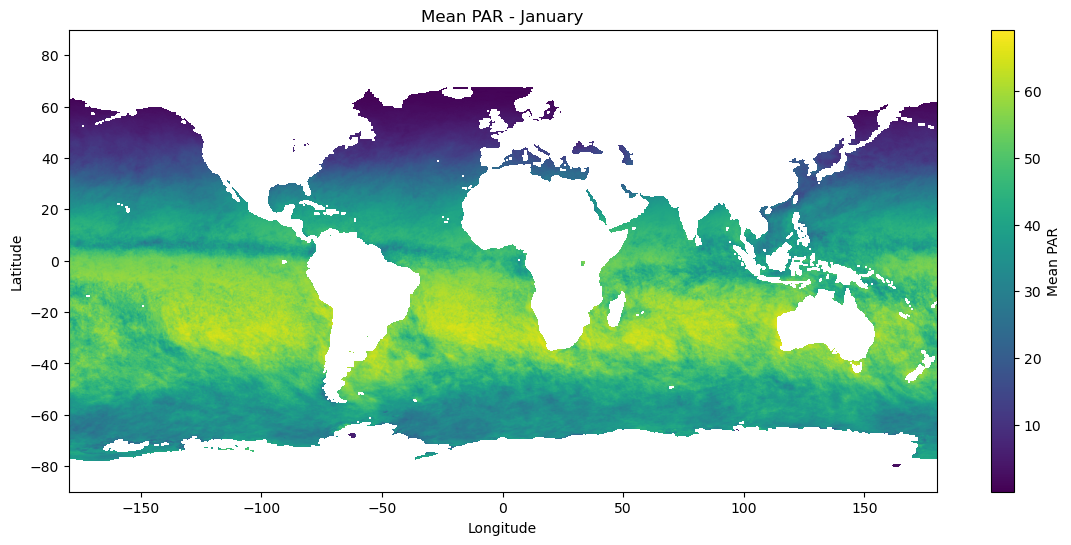

In [58]:
january_files = [f for f in all_files if 1 <= int(f[8:11]) <= 31 and int(f[4:8]) == 2023]
print("January files:", january_files)

par_list = []
par_path = r"/Users/.../PAR(m)"

# 读取每个文件并添加到列表
for par_file in january_files:
    print(par_file)
    file_path = os.path.join(par_path, par_file)
    par_data = loadmat(file_path)['dt']
    par_list.append(par_data)

# 堆叠为 3D 数组 (time, lat, lon)
par_stack = np.stack(par_list, axis=0)

# 计算忽略 NaN 的时间轴平均值
mean_par = np.nanmean(par_stack, axis=0)

# 构建纬度和经度
latitudes = np.linspace(
    90 - (180 / mean_par.shape[0]) / 2,
    -90 + (180 / mean_par.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_par.shape[1]) / 2,
    180 - (360 / mean_par.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_par
}

# 保存为新的 .mat 文件
output_file = 'mean_par_01.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

# 绘制平均 SST 分布
plt.figure(figsize=(14, 6))
plt.imshow(mean_par, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()],
           origin='upper', cmap='viridis', aspect='auto')
plt.colorbar(label='Mean PAR')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean PAR - January')
plt.show()

Feb files: ['par.2023057.hdf.mat', 'par.2023049.hdf.mat', 'par.2023033.hdf.mat', 'par.2023041.hdf.mat']
par.2023057.hdf.mat
par.2023049.hdf.mat
par.2023033.hdf.mat
par.2023041.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


New .mat file saved to mean_par_02.mat


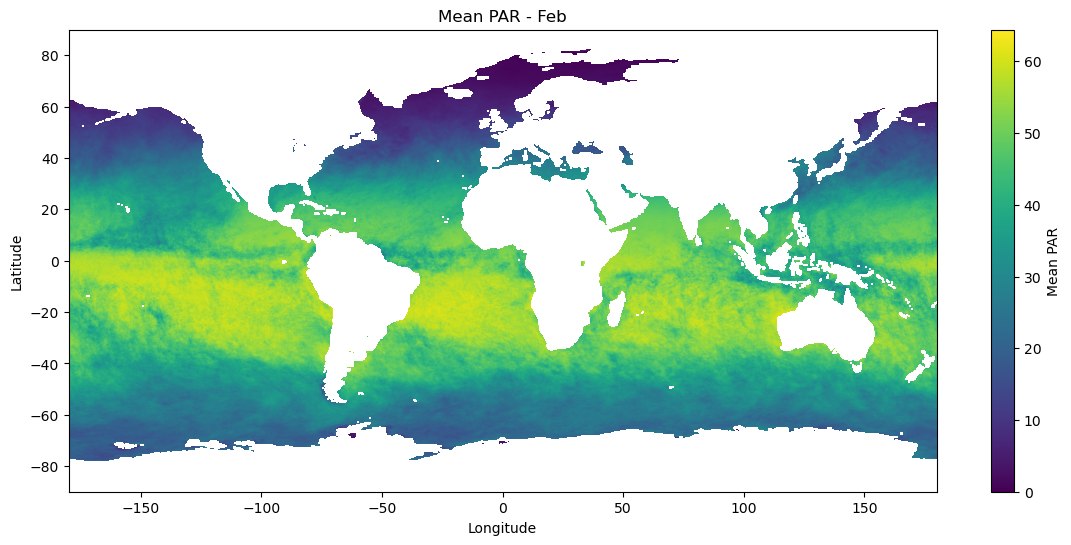

In [59]:
feb_files = [f for f in all_files if 32 <= int(f[8:11]) <= 61 and int(f[4:8]) == 2023]
print("Feb files:", feb_files)

par_list = []
par_path = r"/Users/.../PAR(m)"

# 读取每个文件并添加到列表
for par_file in feb_files:
    print(par_file)
    file_path = os.path.join(par_path, par_file)
    par_data = loadmat(file_path)['dt']
    par_list.append(par_data)

# 堆叠为 3D 数组 (time, lat, lon)
par_stack = np.stack(par_list, axis=0)

# 计算忽略 NaN 的时间轴平均值
mean_par = np.nanmean(par_stack, axis=0)

# 构建纬度和经度
latitudes = np.linspace(
    90 - (180 / mean_par.shape[0]) / 2,
    -90 + (180 / mean_par.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_par.shape[1]) / 2,
    180 - (360 / mean_par.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_par
}

# 保存为新的 .mat 文件
output_file = 'mean_par_02.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

# 绘制平均 SST 分布
plt.figure(figsize=(14, 6))
plt.imshow(mean_par, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()],
           origin='upper', cmap='viridis', aspect='auto')
plt.colorbar(label='Mean PAR')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean PAR - Feb')
plt.show()

In [60]:
march_files = [f for f in all_files if 61 <= int(f[8:11]) <= 90 and int(f[4:8]) == 2023]
print("March files:", march_files)

par_list = []
par_path = r"/Users/..../PAR(m)"

# 读取每个文件并添加到列表
for par_file in march_files:
    print(par_file)
    file_path = os.path.join(par_path, par_file)
    par_data = loadmat(file_path)['dt']
    par_list.append(par_data)

# 堆叠为 3D 数组 (time, lat, lon)
par_stack = np.stack(par_list, axis=0)

# 计算忽略 NaN 的时间轴平均值
mean_par = np.nanmean(par_stack, axis=0)

# 构建纬度和经度
latitudes = np.linspace(
    90 - (180 / mean_par.shape[0]) / 2,
    -90 + (180 / mean_par.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_par.shape[1]) / 2,
    180 - (360 / mean_par.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_par
}

# 保存为新的 .mat 文件
output_file = 'mean_par_03.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

March files: ['par.2023073.hdf.mat', 'par.2023065.hdf.mat', 'par.2023081.hdf.mat', 'par.2023089.hdf.mat']
par.2023073.hdf.mat
par.2023065.hdf.mat
par.2023081.hdf.mat
par.2023089.hdf.mat
New .mat file saved to mean_par_03.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


In [61]:
april_files = [f for f in all_files if 90 <= int(f[8:11]) <= 120 and int(f[4:8]) == 2023]
print("April files:", april_files)

par_list = []
par_path = r"/Users/..../PAR(m)"

for par_file in april_files:
    print(par_file)
    file_path = os.path.join(par_path, par_file)
    par_data = loadmat(file_path)['dt']
    par_list.append(par_data)

par_stack = np.stack(par_list, axis=0)
mean_par = np.nanmean(par_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_par.shape[0]) / 2,
    -90 + (180 / mean_par.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_par.shape[1]) / 2,
    180 - (360 / mean_par.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_par
}

output_file = 'mean_par_04.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

April files: ['par.2023113.hdf.mat', 'par.2023097.hdf.mat', 'par.2023105.hdf.mat']
par.2023113.hdf.mat
par.2023097.hdf.mat
par.2023105.hdf.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


New .mat file saved to mean_par_04.mat


In [62]:
may_files = [f for f in all_files if 121 <= int(f[8:11]) <= 151 and int(f[4:8]) == 2023]
print("May files:", may_files)

par_list = []
par_path = r"/Users/..../PAR(m)"

for par_file in may_files:
    print(par_file)
    file_path = os.path.join(par_path, par_file)
    par_data = loadmat(file_path)['dt']
    par_list.append(par_data)

par_stack = np.stack(par_list, axis=0)
mean_par = np.nanmean(par_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_par.shape[0]) / 2,
    -90 + (180 / mean_par.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_par.shape[1]) / 2,
    180 - (360 / mean_par.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_par
}

output_file = 'mean_par_05.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

May files: ['par.2023145.hdf.mat', 'par.2023137.hdf.mat', 'par.2023121.hdf.mat', 'par.2023129.hdf.mat']
par.2023145.hdf.mat
par.2023137.hdf.mat
par.2023121.hdf.mat
par.2023129.hdf.mat
New .mat file saved to mean_par_05.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


In [63]:
june_files = [f for f in all_files if 152 <= int(f[8:11]) <= 181 and int(f[4:8]) == 2023]
print("June files:", june_files)

par_list = []
par_path = r"/Users/..../PAR(m)"

for par_file in june_files:
    print(par_file)
    file_path = os.path.join(par_path, par_file)
    par_data = loadmat(file_path)['dt']
    par_list.append(par_data)

par_stack = np.stack(par_list, axis=0)
mean_par = np.nanmean(par_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_par.shape[0]) / 2,
    -90 + (180 / mean_par.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_par.shape[1]) / 2,
    180 - (360 / mean_par.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_par
}

output_file = 'mean_par_06.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

June files: ['par.2023161.hdf.mat', 'par.2023169.hdf.mat', 'par.2023153.hdf.mat', 'par.2023177.hdf.mat']
par.2023161.hdf.mat
par.2023169.hdf.mat
par.2023153.hdf.mat
par.2023177.hdf.mat
New .mat file saved to mean_par_06.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


In [64]:
july_files = [f for f in all_files if 182 <= int(f[8:11]) <= 212 and int(f[4:8]) == 2023]
print("July files:", july_files)

par_list = []
par_path = r"/Users/..../PAR(m)"

for par_file in july_files:
    print(par_file)
    file_path = os.path.join(par_path, par_file)
    par_data = loadmat(file_path)['dt']
    par_list.append(par_data)

par_stack = np.stack(par_list, axis=0)
mean_par = np.nanmean(par_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_par.shape[0]) / 2,
    -90 + (180 / mean_par.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_par.shape[1]) / 2,
    180 - (360 / mean_par.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_par
}

output_file = 'mean_par_07.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

July files: ['par.2023185.hdf.mat', 'par.2023209.hdf.mat', 'par.2023201.hdf.mat', 'par.2023193.hdf.mat']
par.2023185.hdf.mat
par.2023209.hdf.mat
par.2023201.hdf.mat
par.2023193.hdf.mat
New .mat file saved to mean_par_07.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


In [66]:
aug_files = [f for f in all_files if 213 <= int(f[8:11]) <= 243 and int(f[4:8]) == 2022]
print("Aug files:", aug_files)

par_list = []
par_path = r"/Users/...../PAR(m)"

for par_file in aug_files:
    print(par_file)
    file_path = os.path.join(par_path, par_file)
    par_data = loadmat(file_path)['dt']
    par_list.append(par_data)

par_stack = np.stack(par_list, axis=0)
mean_par = np.nanmean(par_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_par.shape[0]) / 2,
    -90 + (180 / mean_par.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_par.shape[1]) / 2,
    180 - (360 / mean_par.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_par
}

output_file = 'mean_par_08.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

Aug files: ['par.2022225.hdf.mat', 'par.2022241.hdf.mat', 'par.2022233.hdf.mat', 'par.2022217.hdf.mat']
par.2022225.hdf.mat
par.2022241.hdf.mat
par.2022233.hdf.mat
par.2022217.hdf.mat
New .mat file saved to mean_par_08.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


In [67]:
sep_files = [f for f in all_files if 244 <= int(f[8:11]) <= 273 and int(f[4:8]) == 2022]
print("Sep files:", sep_files)

par_list = []
par_path = r"/Users/...../PAR(m)"

for par_file in sep_files:
    print(par_file)
    file_path = os.path.join(par_path, par_file)
    par_data = loadmat(file_path)['dt']
    par_list.append(par_data)

par_stack = np.stack(par_list, axis=0)
mean_par = np.nanmean(par_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_par.shape[0]) / 2,
    -90 + (180 / mean_par.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_par.shape[1]) / 2,
    180 - (360 / mean_par.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_par
}

output_file = 'mean_par_09.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

Sep files: ['par.2022257.hdf.mat', 'par.2022273.hdf.mat', 'par.2022249.hdf.mat', 'par.2022265.hdf.mat']
par.2022257.hdf.mat
par.2022273.hdf.mat
par.2022249.hdf.mat
par.2022265.hdf.mat
New .mat file saved to mean_par_09.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


In [68]:
oct_files = [f for f in all_files if 274 <= int(f[8:11]) <= 304 and int(f[4:8]) == 2022]
print("Oct files:", oct_files)

par_list = []
par_path = r"/Users/.../PAR(m)"

for par_file in oct_files:
    print(par_file)
    file_path = os.path.join(par_path, par_file)
    par_data = loadmat(file_path)['dt']
    par_list.append(par_data)

par_stack = np.stack(par_list, axis=0)
mean_par = np.nanmean(par_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_par.shape[0]) / 2,
    -90 + (180 / mean_par.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_par.shape[1]) / 2,
    180 - (360 / mean_par.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_par
}

output_file = 'mean_par_10.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

Oct files: ['par.2022297.hdf.mat', 'par.2022289.hdf.mat', 'par.2022281.hdf.mat']
par.2022297.hdf.mat
par.2022289.hdf.mat
par.2022281.hdf.mat
New .mat file saved to mean_par_10.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


In [69]:
nov_files = [f for f in all_files if 305 <= int(f[8:11]) <= 334 and int(f[4:8]) == 2022]
print("Nov files:", nov_files)

par_list = []
par_path = r"/Users/..../PAR(m)"

for par_file in nov_files:
    print(par_file)
    file_path = os.path.join(par_path, par_file)
    par_data = loadmat(file_path)['dt']
    par_list.append(par_data)

par_stack = np.stack(par_list, axis=0)
mean_par = np.nanmean(par_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_par.shape[0]) / 2,
    -90 + (180 / mean_par.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_par.shape[1]) / 2,
    180 - (360 / mean_par.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_par
}

output_file = 'mean_par_11.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

Nov files: ['par.2022313.hdf.mat', 'par.2022329.hdf.mat', 'par.2022321.hdf.mat', 'par.2022305.hdf.mat']
par.2022313.hdf.mat
par.2022329.hdf.mat
par.2022321.hdf.mat
par.2022305.hdf.mat
New .mat file saved to mean_par_11.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


In [70]:
dec_files = [f for f in all_files if 335 <= int(f[8:11]) <= 365 and int(f[4:8]) == 2022]
print("Dec files:", dec_files)

par_list = []
par_path = r"/Users/...../PAR(m)"

for par_file in dec_files:
    print(par_file)
    file_path = os.path.join(par_path, par_file)
    par_data = loadmat(file_path)['dt']
    par_list.append(par_data)

par_stack = np.stack(par_list, axis=0)
mean_par = np.nanmean(par_stack, axis=0)

latitudes = np.linspace(
    90 - (180 / mean_par.shape[0]) / 2,
    -90 + (180 / mean_par.shape[0]) / 2,
    mean_chl.shape[0]
)
longitudes = np.linspace(
    -180 + (360 / mean_par.shape[1]) / 2,
    180 - (360 / mean_par.shape[1]) / 2,
    mean_chl.shape[1]
)

output_data = {
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes,
    'mean_CHL': mean_par
}

output_file = 'mean_par_12.mat'
savemat(output_file, output_data)
print(f"New .mat file saved to {output_file}")

Dec files: ['par.2022337.hdf.mat', 'par.2022345.hdf.mat', 'par.2022361.hdf.mat', 'par.2022353.hdf.mat']
par.2022337.hdf.mat
par.2022345.hdf.mat
par.2022361.hdf.mat
par.2022353.hdf.mat
New .mat file saved to mean_par_12.mat


/opt/anaconda3/envs/pymc_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
